In [12]:
import pandas as pd
import numpy as np
data = pd.read_csv('../Datasets/short_data.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          1209 non-null   int64  
 1   __v                                                 1209 non-null   int64  
 2   _id                                                 1209 non-null   object 
 3   conversationsMeta.averageConversationLength         1209 non-null   float64
 4   conversationsMeta.averageConversationLengthInDays   1209 non-null   float64
 5   conversationsMeta.longestConversation               1209 non-null   int64  
 6   conversationsMeta.longestConversationInDays         1209 non-null   float64
 7   conversationsMeta.medianConversationLength          1209 non-null   int64  
 8   conversationsMeta.medianConversationLengthInDays    1209 non-null   float64
 9

## Исследование полей

Кого больше среди пользователей: мужчин или женщин?

In [25]:
print(data['user.gender'].isna().sum())
print(data['user.gender'].unique())

1
['M' 'F' nan]


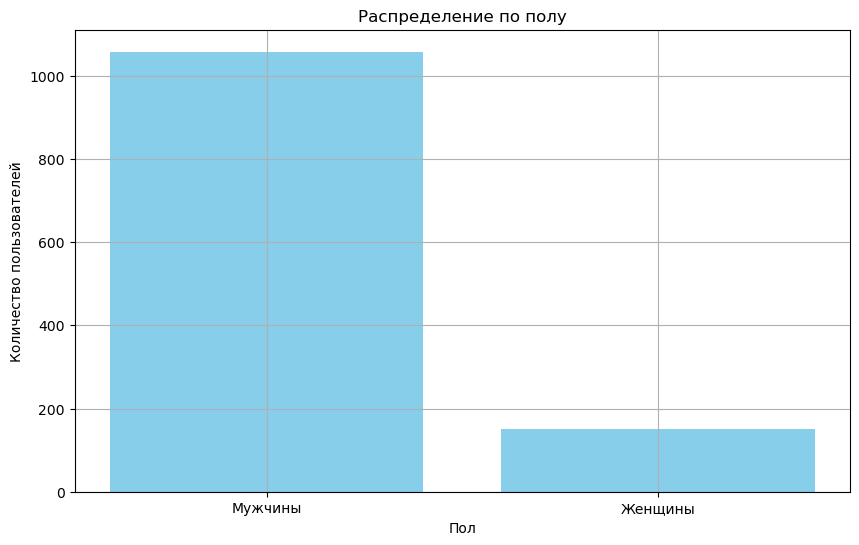

In [26]:
import matplotlib.pyplot as plt

# Строим гистограмму для поля 'user.gender'
gender_counts = data['user.gender'].value_counts()
labels = ['Мужчины' if x == 'M' else 'Женщины' for x in gender_counts.index]

# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(labels, gender_counts, color='skyblue')
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


У кого больше совпадений?

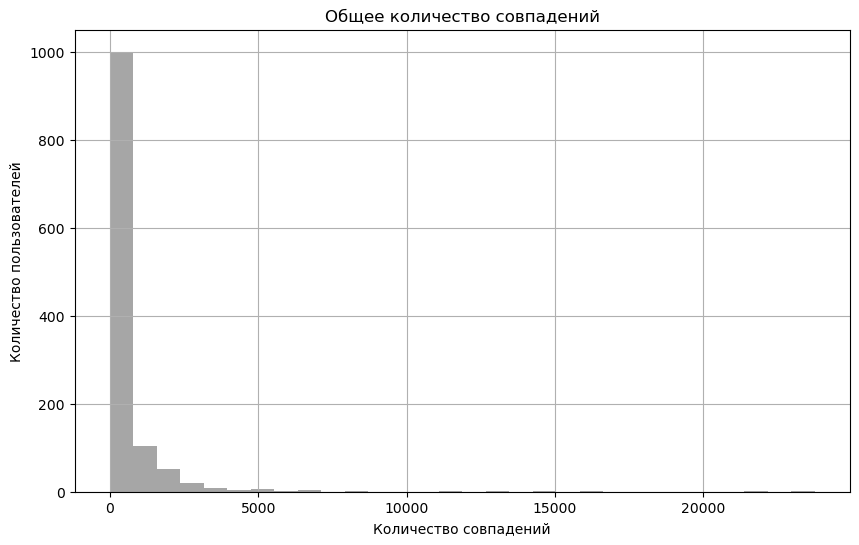

In [34]:
total_matches = data['Total_matches']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=30, color='gray', alpha=0.7)
plt.title('Общее количество совпадений')
plt.xlabel('Количество совпадений')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()


Видно, что больше 5000 рассматривать не имеет смысла

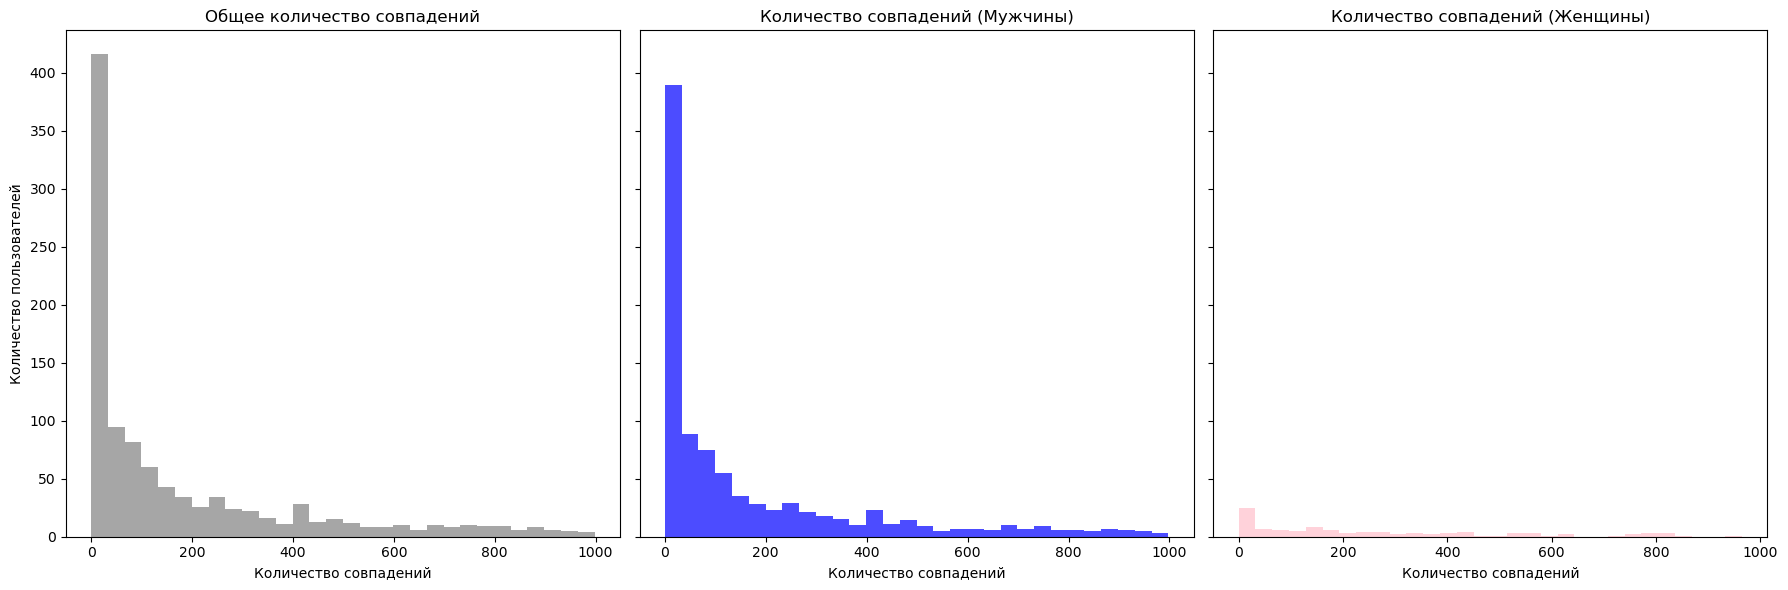

In [35]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_matches']
female_data = data[data['user.gender'] == 'F']['Total_matches']

male_data = male_data[male_data <= 1000]
female_data = female_data[female_data <= 1000]

# Общие данные
total_matches_data = data['Total_matches']
total_matches_data = total_matches_data[total_matches_data <= 1000]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=30, color='gray', alpha=0.7)
axes[0].set_title('Общее количество совпадений')
axes[0].set_xlabel('Количество совпадений')
axes[0].set_ylabel('Количество пользователей')

# Гистограмма для мужчин
axes[1].hist(male_data, bins=30, color='blue', alpha=0.7)
axes[1].set_title('Количество совпадений (Мужчины)')
axes[1].set_xlabel('Количество совпадений')

# Гистограмма для женщин
axes[2].hist(female_data, bins=30, color='pink', alpha=0.7)
axes[2].set_title('Количество совпадений (Женщины)')
axes[2].set_xlabel('Количество совпадений')

# Отображение гистограмм
plt.tight_layout()
plt.show()


Кто чаще пишет сообщения?

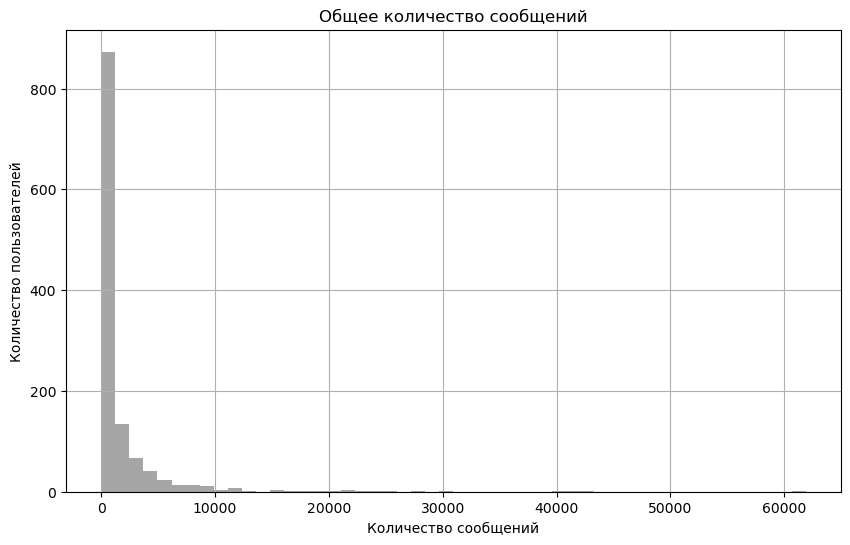

In [40]:
total_matches = data['Total_messagesSent']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=50, color='gray', alpha=0.7)
plt.title('Общее количество сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()


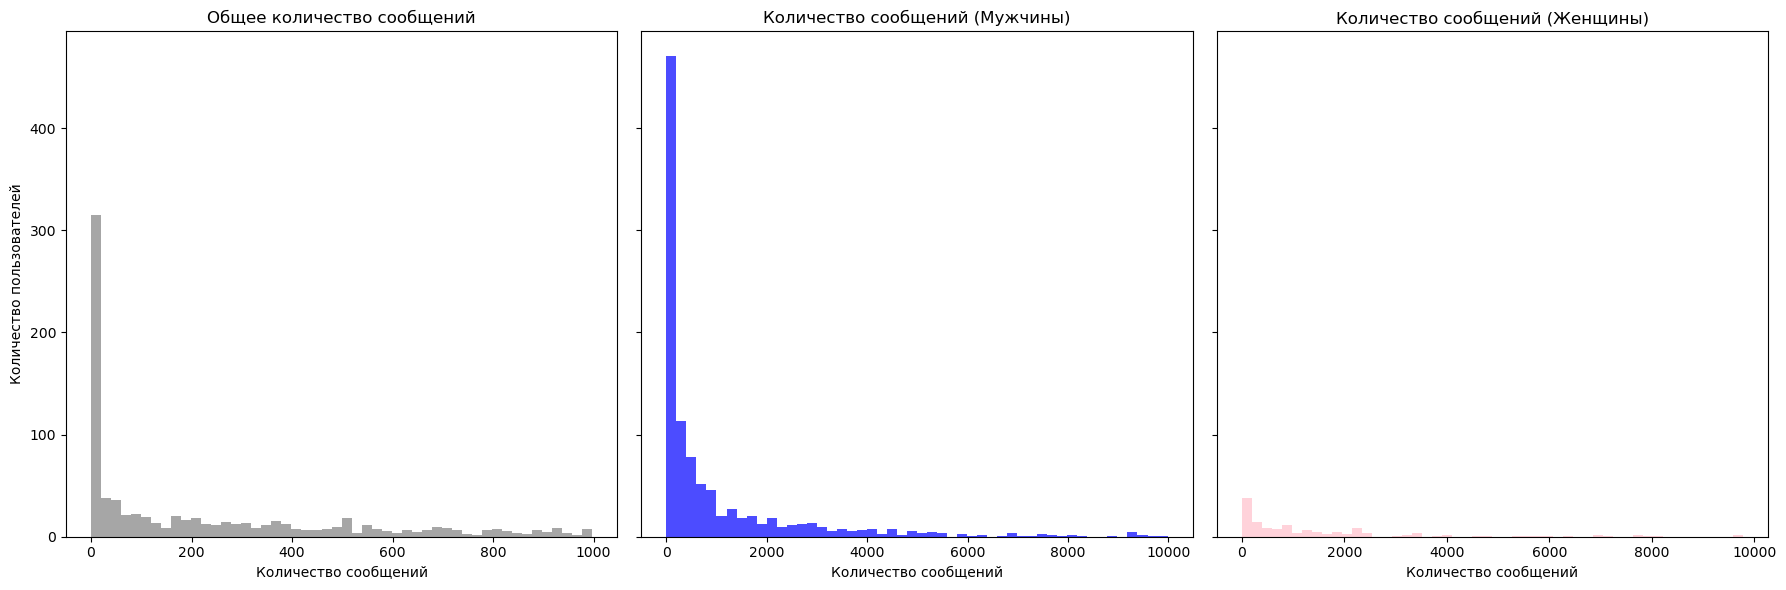

In [39]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_messagesSent']
female_data = data[data['user.gender'] == 'F']['Total_messagesSent']

male_data = male_data[male_data <= 10000]
female_data = female_data[female_data <= 10000]

# Общие данные
total_matches_data = data['Total_messagesSent']
total_matches_data = total_matches_data[total_matches_data <= 1000]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=50, color='gray', alpha=0.7)
axes[0].set_title('Общее количество сообщений')
axes[0].set_xlabel('Количество сообщений')
axes[0].set_ylabel('Количество пользователей')

# Гистограмма для мужчин
axes[1].hist(male_data, bins=50, color='blue', alpha=0.7)
axes[1].set_title('Количество сообщений (Мужчины)')
axes[1].set_xlabel('Количество сообщений')

# Гистограмма для женщин
axes[2].hist(female_data, bins=50, color='pink', alpha=0.7)
axes[2].set_title('Количество сообщений (Женщины)')
axes[2].set_xlabel('Количество сообщений')

# Отображение гистограмм
plt.tight_layout()
plt.show()


Кто чаще заходит в приложение?

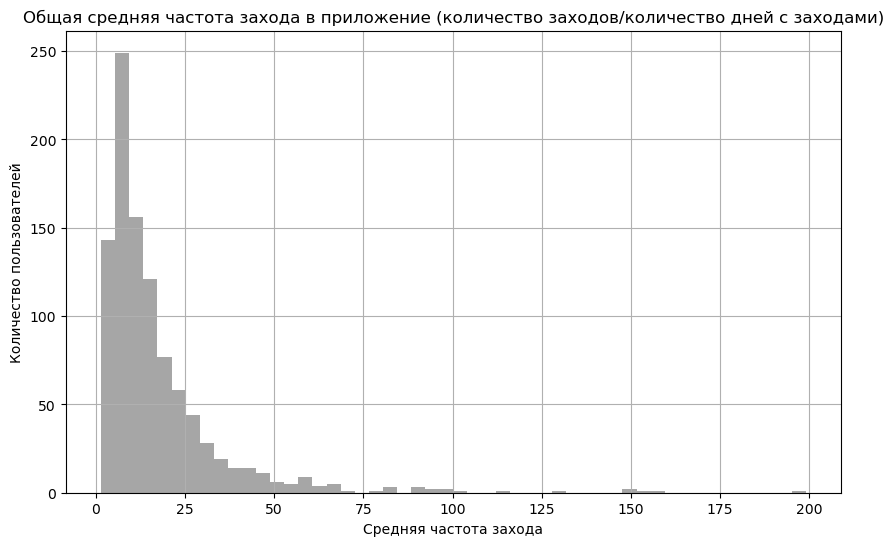

In [42]:
total_matches = data['Total_appOpens'] / data['DaysWith_appOpens']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=50, color='gray', alpha=0.7)
plt.title('Общая средняя частота захода в приложение (количество заходов/количество дней с заходами)')
plt.xlabel('Средняя частота захода')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

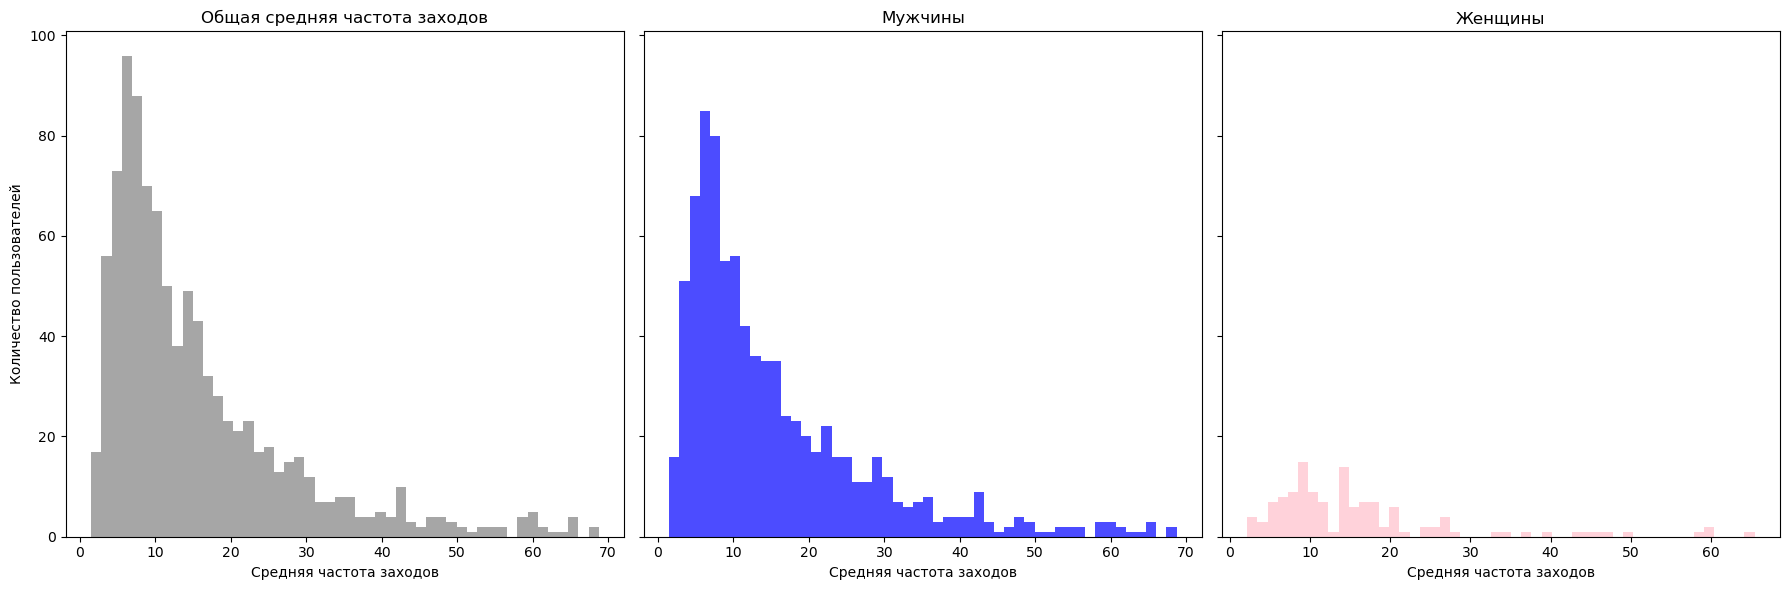

In [44]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_appOpens'] / data[data['user.gender'] == 'M']['DaysWith_appOpens']
female_data = data[data['user.gender'] == 'F']['Total_appOpens'] / data[data['user.gender'] == 'F']['DaysWith_appOpens']

male_data = male_data[male_data <= 75]
female_data = female_data[female_data <= 75]

# Общие данные
total_matches_data = data['Total_appOpens'] / data['DaysWith_appOpens']
total_matches_data = total_matches_data[total_matches_data <= 75]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=50, color='gray', alpha=0.7)
axes[0].set_title('Общая средняя частота заходов')
axes[0].set_xlabel('Средняя частота заходов')
axes[0].set_ylabel('Количество пользователей')

# Гистограмма для мужчин
axes[1].hist(male_data, bins=50, color='blue', alpha=0.7)
axes[1].set_title('Мужчины')
axes[1].set_xlabel('Средняя частота заходов')

# Гистограмма для женщин
axes[2].hist(female_data, bins=50, color='pink', alpha=0.7)
axes[2].set_title('Женщины')
axes[2].set_xlabel('Средняя частота заходов')

# Отображение гистограмм
plt.tight_layout()
plt.show()
